https://www.fool.com/investing/2020/08/18/to-identify-resilience-check-company-vital-sign/

# Fundamental Data Scraper

Easy peezy

In [173]:
import FundamentalAnalysis as fa

In [177]:
ticker = "AAPL"
api_key = '410c9480ef0825c9d063beecf1536923'
balance_sheet_annually = fa.balance_sheet_statement('AAN', api_key, period="quarter")
dcf_quarterly = fa.discounted_cash_flow(ticker, api_key, period="quarter")
dcf_quarterly

,2021-01,2020-09,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,...,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06
date,2021-01-29,2020-09-26,2020-06-27,2020-03-28,2019-12-28,2019-09-28,2019-06-29,2019-03-30,2018-12-29,2018-09-29,...,2011-09-24,2011-06-25,2011-03-26,2010-12-25,2010-09-25,2010-06-26,2010-03-27,2009-12-26,2009-09-26,2009-06-27
Stock Price,131.96,115.05,94.81,70.7925,77.2375,62.2625,52.42,51.1525,39.075,53.06,...,14.4918,14.2321,12.6075,12.0518,11.03,9.26,9.625,7.2525,7.23143,5.71786
DCF,134.129,117.241,96.2942,72.4818,78.8949,64.3964,54.4303,52.6142,40.9081,53.9433,...,14.8649,14.6926,13.2172,12.4626,11.463,9.63373,10.0127,7.54797,7.43698,5.93804


In [168]:
url = 'https://www.investing.com/equities/aarons-income-statement'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
r = requests.get(url, headers=headers)

In [169]:
soup = BeautifulSoup(r.content, "html.parser")
table = soup.find_all('table')[1]
rows = table.find_all('tr')
row_list = list()

In [170]:
for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)

In [171]:
row_list

[['Revenue', '1305.54', '1030.12', '1101.27', '442.35'],
 ['Other Revenue, Total', '-', '-', '-', '-']]

In [172]:
df_bs = pd.DataFrame(row_list,columns=['2020_09','2020_06','2020_03','2019_12'])

ValueError: 4 columns passed, passed data had 5 columns

In [143]:
soup = BeautifulSoup(r.text)

In [144]:
alldata = soup.find('table')

In [141]:
alldata

<div class="YDC-UH Bgi($uhGrayGradient) D(n)--print Pos(r) Z(1)" data-reactid="6" id="YDC-UH"><div class="YDC-UH Miw(1007px) Maw(1260px) tablet_Miw(600px)--noRightRail Bxz(bb) Bdstartc(t) Bdstartw(20px) Bdendc(t) Bdends(s) Bdendw(20px) Bdstarts(s) Mx(a) tablet_Bd(n)" data-reactid="7" id="YDC-UH-Stack"><div data-reactid="8" id="YDC-UH-Stack-Composite"><div data-reactid="9"><div data-locator="subtree-root" id="mrt-node-UH-0-HeaderDesktop"><div id="UH-0-HeaderDesktop-Proxy"><div><div class="Bgc(t) Bdbc(t) Bdbs(s) Bdbw(1px) D(tb) Pos(f) Tbl(f) W(100%) Z(10) has-scrolled_Bdc($c-fuji-grey-d) Scrolling_Bdc($c-fuji-grey-d) has-scrolled_Bxsh($headerShadow) Scrolling_Bxsh($headerShadow) Bxz(bb) Mx(a) Miw(1007px) Start(0) wafer-rapid-module" id="header-wrapper"><nav class="C(#fff) Fz(13px) H(22px) Pos(r) Trs($navigationBarTransition) modal-open_Mt($topBarHideMargin) has-scrolled_Mt($topBarHideMargin)" id="masterNav"><ul class="H(22px) Lh(1.7) Bgc(#2d1152) P(0) Whs(nw) M(0)" id="eyebrow"><li class

# Sentdex Python for Finance Price

# One Stock

In [145]:
# Necessary packages
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')
from bs4 import BeautifulSoup
import sklearn
import datetime as dt
import finplot as fp
from mpl_finance import candlestick_ohlc
import pickle
import warnings
warnings.simplefilter("ignore")
import os
import numpy as np
import lxml.html as lh

In [27]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

In [28]:
df = web.DataReader('TSLA','yahoo', start, end)

In [29]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.80000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.15800,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.00000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.60000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.00000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990


In [34]:
df['100MA'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

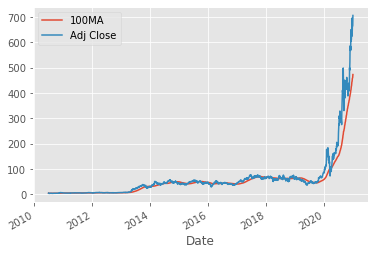

In [35]:
df[['100MA','Adj Close']].plot()

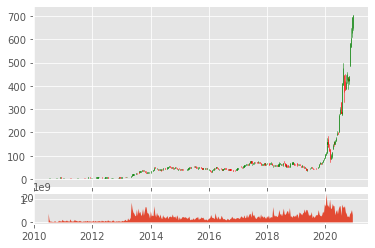

In [66]:
df_ohlc = df['Adj Close'].resample('11D').ohlc()
df_volume = df['Volume'].resample('11D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values,0)

# ax1.plot(df.index, df['Adj Close'])
# ax1.plot(df.index, df['100MA'])
# ax2.bar(df.index, df['Volume'])

# 100 Stocks

In [70]:
# Reading in pickled company list
with open('public_company_list.data', 'rb') as filehandle:
    companies = pickle.load(filehandle)

In [74]:
def get_data_from_yahoo():
    if not os.path.exists('stock_price_dfs'):
        os.makedirs('stock_price_dfs')
        
    start = dt.datetime(2010,1,1)
    end = dt.datetime(2020,12,31)
    
    for company, ticker in companies[:100]:
        if not os.path.exists('stock_price_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_price_dfs/{}.csv'.format(ticker))
            except:
                pass
        else:
            print('Already have {}'.format(ticker))

In [75]:
get_data_from_yahoo()

Already have AAN
Already have AAOI
Already have AAON
Already have AAT
Already have AAWW
Already have AAXN
Already have ABCB
Already have ABEO
Already have ABG
Already have ABM
Already have ABTX
Already have AC
Already have ACA
Already have ACAD
Already have ACBI
Already have ACCO
Already have ACER


In [105]:
def compile_data():
    
    main_df = pd.DataFrame()
    
    for company, ticker in companies[:100]:
        try:
            df = pd.read_csv('stock_price_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns = {'Adj Close': ticker}, inplace=True)
            df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')
        except:
            pass

        
    return main_df
        

In [106]:
combo = compile_data()

In [123]:
def visualize_data():
    df_corr = combo.corr()
    data = df_corr.values
    fig = plt.figure(figsize=(20,10))
    ax = fig.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

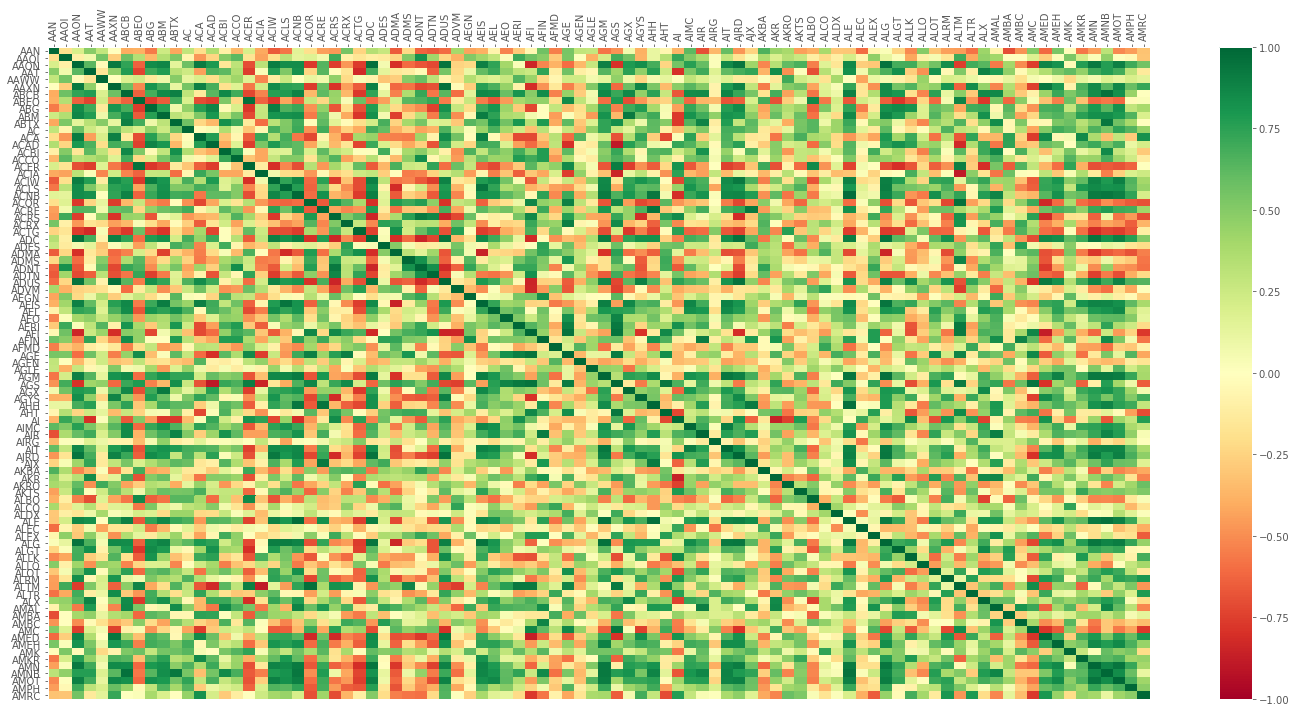

In [124]:
visualize_data()

# Fundamental Data

In [1]:
import requests
import pandas as pd
import json
import yfinance as yf

In [6]:
companies = ['AMZN','AAPL','IBM']

In [129]:
info = yf.Ticker('AAPL')

In [130]:
info.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [11]:
company_metrics = {}
for company in companies:
    
    company_metrics[company] = {}
    company_info = yf.Ticker(company)
    
    company_metrics[company]['book value'] = company_info.info['bookValue']
    company_metrics[company]['book value'] = company_info.info['payoutRatio']
    company_metrics[company]['book value'] = company_info.info['beta']
    company_metrics[company]['book value'] = company_info.info['trailingPE']
    company_metrics[company]['book value'] = company_info.info['priceToSalesTrailing12Months']
    company_metrics[company]['book value'] = company_info.info['forwardPE']
    company_metrics[company]['book value'] = company_info.info['bookValue']
    company_metrics[company]['book value'] = company_info.info['bookValue']
    company_metrics[company]['book value'] = company_info.info['bookValue']
    

In [12]:
company_metrics

{'AMZN': {'book value': 164.89},
 'AAPL': {'book value': 3.936},
 'IBM': {'book value': 23.075}}

In [68]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-financials"

querystring = {"symbol":"AMRN","region":"US"}

headers = {
    'x-rapidapi-key': "1343dd437bmshfcee9a8ffabf9edp129104jsn6f05c42f2032",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [73]:
json_data = json.loads(response.text)['cashflowStatementHistory']['cashflowStatements'][0]

In [74]:
with open('AMRN.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [75]:
data = pd.read_json('AMRN.json')

In [76]:
data

,changeToLiabilities,totalCashflowsFromInvestingActivities,netBorrowings,totalCashFromFinancingActivities,changeToOperatingActivities,issuanceOfStock,netIncome,changeInCash,endDate,repurchaseOfStock,totalCashFromOperatingActivities,depreciation,changeToInventory,changeToAccountReceivables,maxAge,changeToNetincome,capitalExpenditures
raw,66049000,-2478000,-31652000,409612000,-17316000,466751000,-22645000,397768000,1577750400,-25487000,-9366000,859000,-18967000,-49907000,1,30917000,-2478000
fmt,66.05M,-2.48M,-31.65M,409.61M,-17.32M,466.75M,-22.64M,397.77M,2019-12-31,-25.49M,-9.37M,859k,-18.97M,-49.91M,1,30.92M,-2.48M
longFmt,"66,049,000","-2,478,000","-31,652,000","409,612,000","-17,316,000","466,751,000","-22,645,000","397,768,000",NaN,"-25,487,000","-9,366,000","859,000","-18,967,000","-49,907,000",1,"30,917,000","-2,478,000"


In [13]:
msft = yf.Ticker('MSFT')

In [19]:
msft.info['bookValue']

17.259

In [22]:
msft.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,1031788800,0.0,0.0
1986-03-14,0.061893,0.065209,0.061893,0.064103,308160000,0.0,0.0
1986-03-17,0.064103,0.065761,0.064103,0.065209,133171200,0.0,0.0
1986-03-18,0.065209,0.065761,0.062998,0.063551,67766400,0.0,0.0
1986-03-19,0.063551,0.064103,0.061893,0.062446,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-01-22,227.080002,230.070007,225.800003,225.949997,30172700,0.0,0.0
2021-01-25,229.119995,229.779999,224.220001,229.529999,33152100,0.0,0.0
2021-01-26,231.860001,234.179993,230.080002,232.330002,49169600,0.0,0.0


In [4]:
def getdata(stock):
    company_quote = requests.get(f"https://financialmodelingprep.com/api/v3/quote/{stock}")
    company_quote = company_quote.json()
    
    return company_quote, company_quote

In [5]:
getdata('AAPL')

({'Error Message': 'Invalid API KEY. Please retry or visit our documentation to create one FREE https://financialmodelingprep.com/developer/docs'},
 {'Error Message': 'Invalid API KEY. Please retry or visit our documentation to create one FREE https://financialmodelingprep.com/developer/docs'})